┌───┐
q_0: ───────■──┤ H ├
     ┌───┐┌─┴─┐├───┤
q_1: ┤ X ├┤ X ├┤ H ├
     └───┘└───┘└───┘

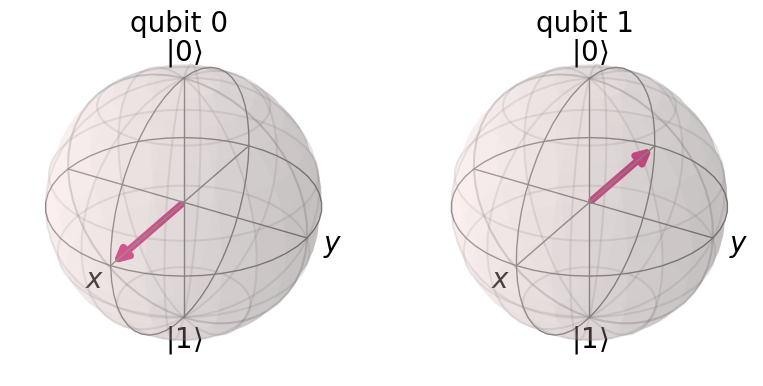

In [7]:
# play with qiskit bloch sphere, figure out the possible gate
import numpy as np
from qiskit.quantum_info.operators import Operator
from qiskit.extensions.unitary import UnitaryGate
from qiskit import QuantumCircuit,transpile
qc = QuantumCircuit(2)
#qc.rx(np.pi/2,0)
#qc.ry(np.pi/2,1)
#qc.x(0)
qc.cnot(0,1)
qc.h([0,1])
#U
qc.cnot(0,1)

qc.cnot(1,0)
#U
qc.cnot(0,1)

qc.h([0,1])
display(qc.decompose(reps=0).draw())
#trans_qc = transpile(qc,basis_gates=['h', 'cx','t'],optimization_level=0)#backend=Aer.get_backend("aer_simulator_statevector"))
#display(trans_qc.draw())
#qasm_ = trans_qc.qasm()
##print(qasm_)
##Operator(qc)
from qiskit import execute, Aer
from qiskit.visualization import plot_bloch_multivector

backend = Aer.get_backend("statevector_simulator")
job = execute(qc,backend=backend)
statevector = job.result().get_statevector()
#print(statevector)
plot_bloch_multivector(statevector)

In [26]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

def U():
    """
    This quantum function will simply contain H, T and CNOT gates.
    It will not return any value.
    """

    # Put your solution here #
    #hadamard,cnot,t
    qml.CNOT([0,1])

dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def circuit():
    """
    Main circuit given in the statement, here the operators you have defined in U will be embedded.
    """

    qml.CNOT(wires=[0, 1])

    #qml.Hadamard(wires=0)
    #qml.Hadamard(wires=1)

    U()
#
    qml.CNOT(wires=[1, 0])
#
    U()
#
    #qml.Hadamard(wires=0)
    #qml.Hadamard(wires=1)

    return qml.state()

In [27]:
array_to_latex(qml.matrix(circuit)().real)

<IPython.core.display.Latex object>

In [17]:
from qiskit .visualization import array_to_latex
array_to_latex(qml.matrix(circuit)().real)

<IPython.core.display.Latex object>

In [20]:
array_to_latex(qml.matrix(qml.SWAP)(wires=[0, 1]))

<IPython.core.display.Latex object>

In [21]:
# These functions are responsible for testing the solution.

def run(input: str) -> str:
    matrix = qml.matrix(circuit)().real

    with qml.tape.QuantumTape() as tape:
        U()

    names = [op.name for op in tape.operations]
    return json.dumps({"matrix": matrix.tolist(), "gates": names})

def check(user_output: str, expected_output: str) -> str:

    parsed_output = json.loads(user_output)
    matrix_user = np.array(parsed_output["matrix"])
    gates = parsed_output["gates"]

    assert np.allclose(matrix_user, qml.matrix(qml.SWAP)(wires=[0, 1]))
    assert (
        len(set(gates)) == 3
        and "Hadamard" in gates
        and "CNOT" in gates
        and "T" in gates
    )


test_cases = [['No input', 'No output']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...


AssertionError: 